# 1. 标量

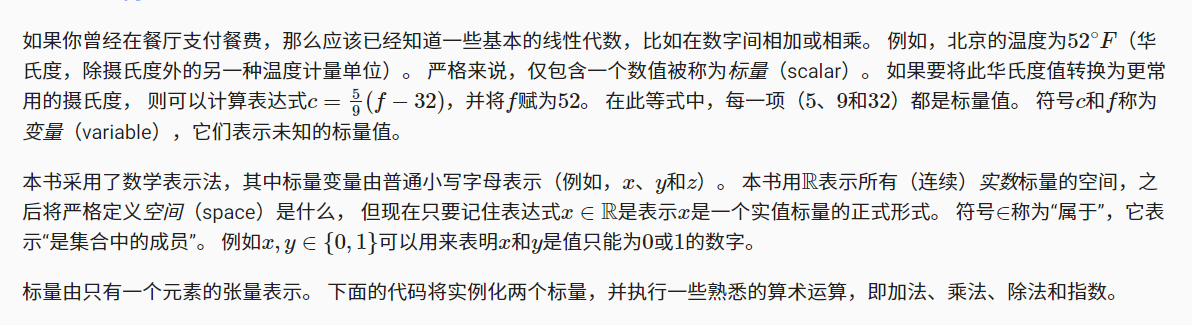

In [1]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

# 2. 向量

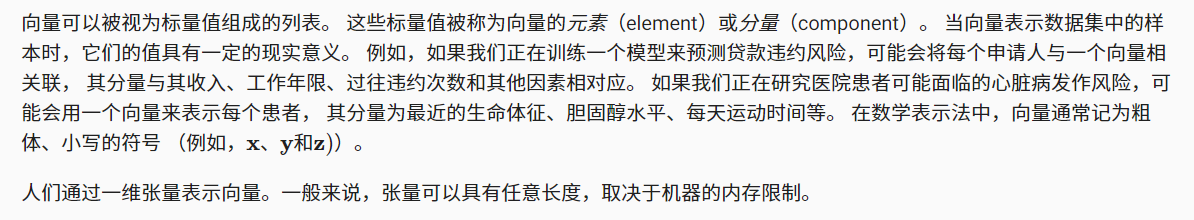

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

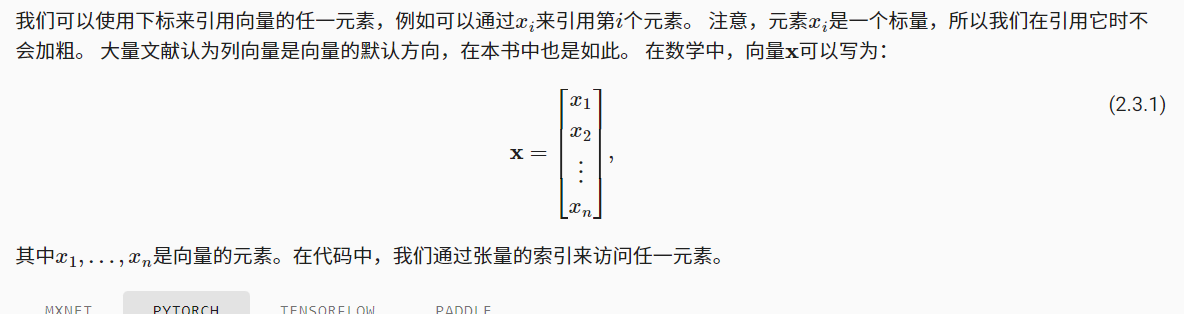

In [3]:
x[3]

tensor(3)

## 2.1. 长度、维度和形状

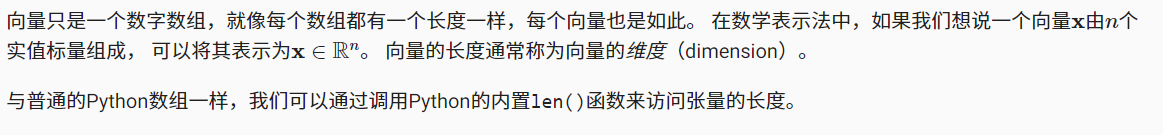

In [4]:
len(x)

4

当用张量表示一个向量（只有一个轴）时，我们也可以通过.shape属性访问向量的长度。 形状（shape）是一个元素组，列出了张量沿每个轴的长度（维数）。 对于只有一个轴的张量，形状只有一个元素。

In [5]:
x.shape

torch.Size([4])

请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

# 3. 矩阵

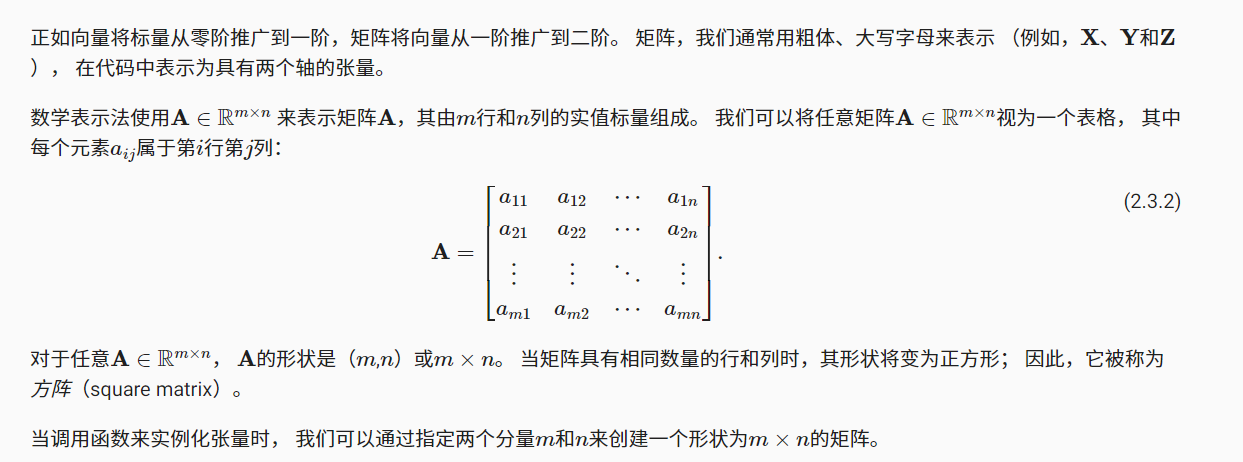

In [6]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

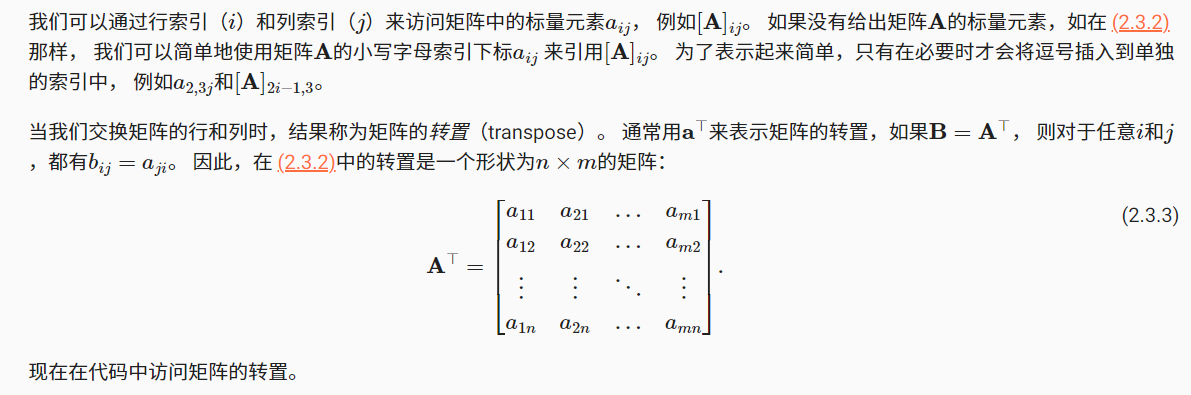

访问矩阵的转置

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

作为方阵的一种特殊类型，对称矩阵（symmetric matrix）$\mathbf{A}$等于其转置：$\mathbf{A} = \mathbf{A}^\top$。 这里定义一个对称矩阵$\mathbf{B}$
：

In [8]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

B与它的转置进行比较

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

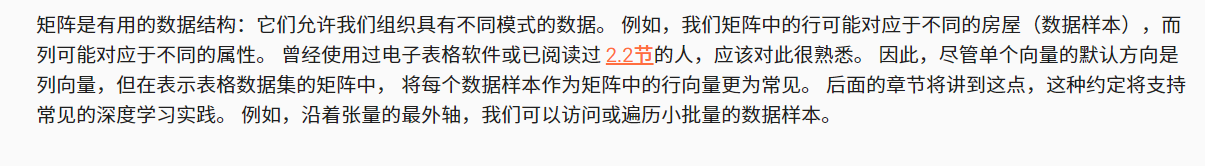

# 4. 张量

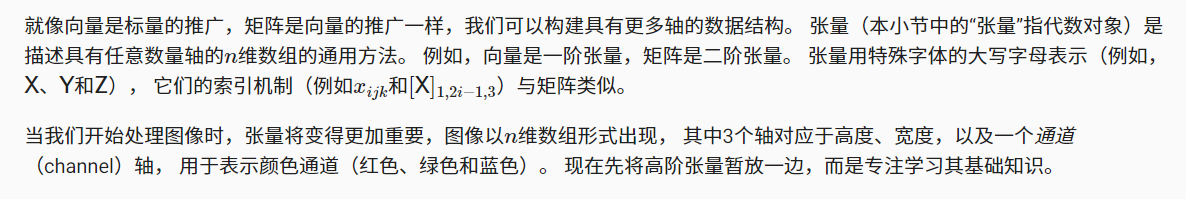

In [10]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

# 5. 张量算法的基本性质

标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [11]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

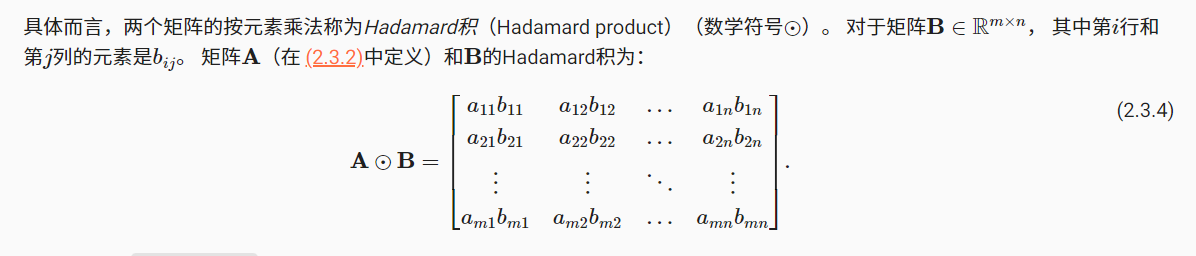

In [12]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [13]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

# 6. 降维

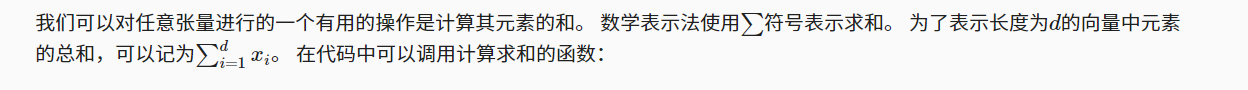

In [14]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

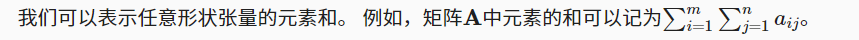

In [15]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

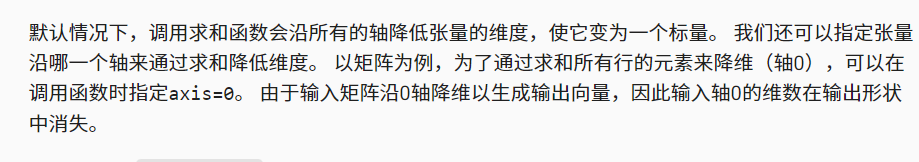

In [16]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

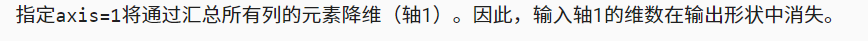

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

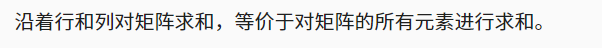

In [18]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

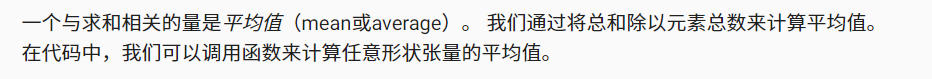

In [19]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

同样，计算平均值的函数也可以沿指定轴降低张量的维度。

In [20]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

## 6.1. 非降维求和

调用函数来计算总和或均值时保持轴数不变会很有用。

In [21]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。

In [22]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

如果我们想沿某个轴计算A元素的累积总和， 比如axis=0（按行计算），可以调用cumsum函数。 此函数不会沿任何轴降低输入张量的维度。

In [23]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

# 7. 点积（Dot Product）

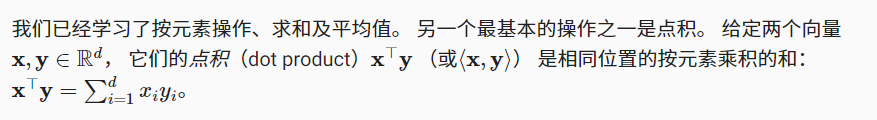

In [24]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

可以通过执行按元素乘法，然后进行求和来表示两个向量的点积：

In [25]:
torch.sum(x * y)

tensor(6.)

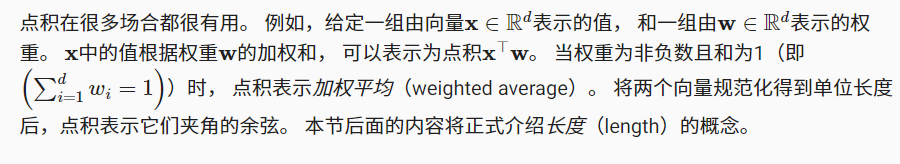

# 8. 矩阵-向量积

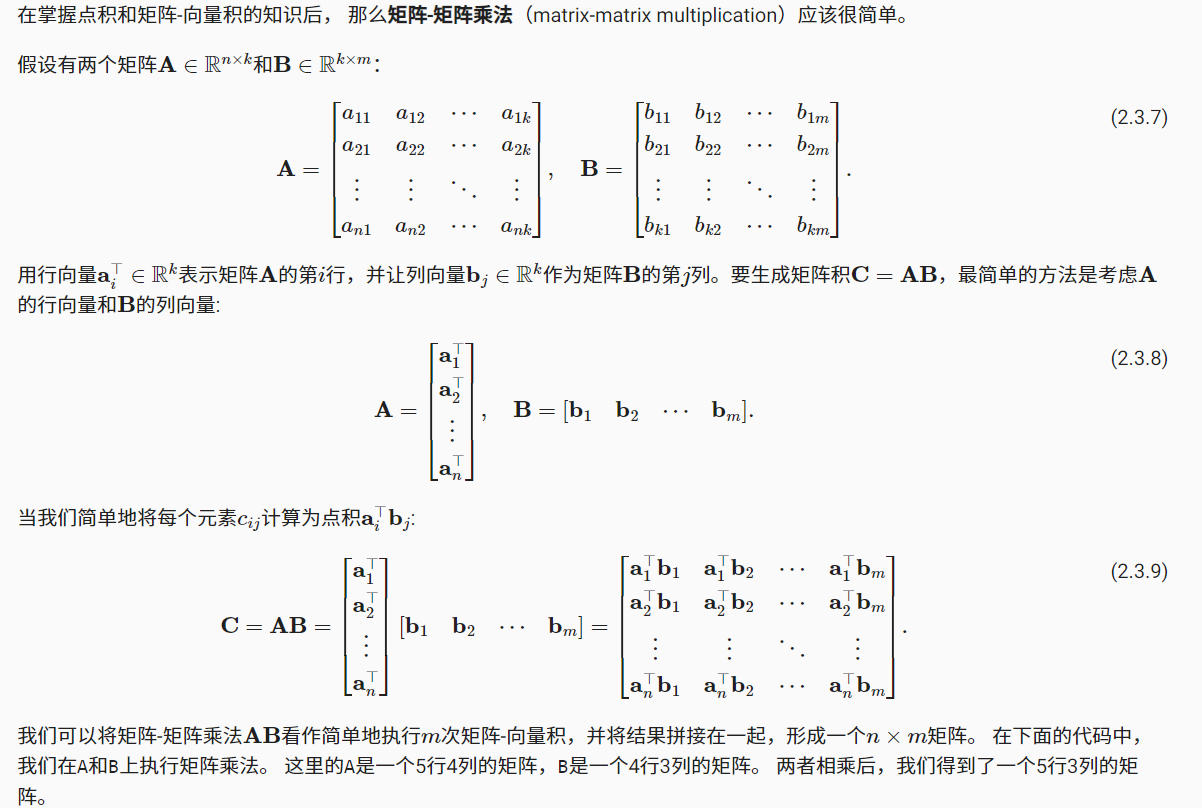

在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [26]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

矩阵-矩阵乘法可以简单地称为**矩阵**乘法，不应与”Hadamard积”混淆。

# 10. 范数

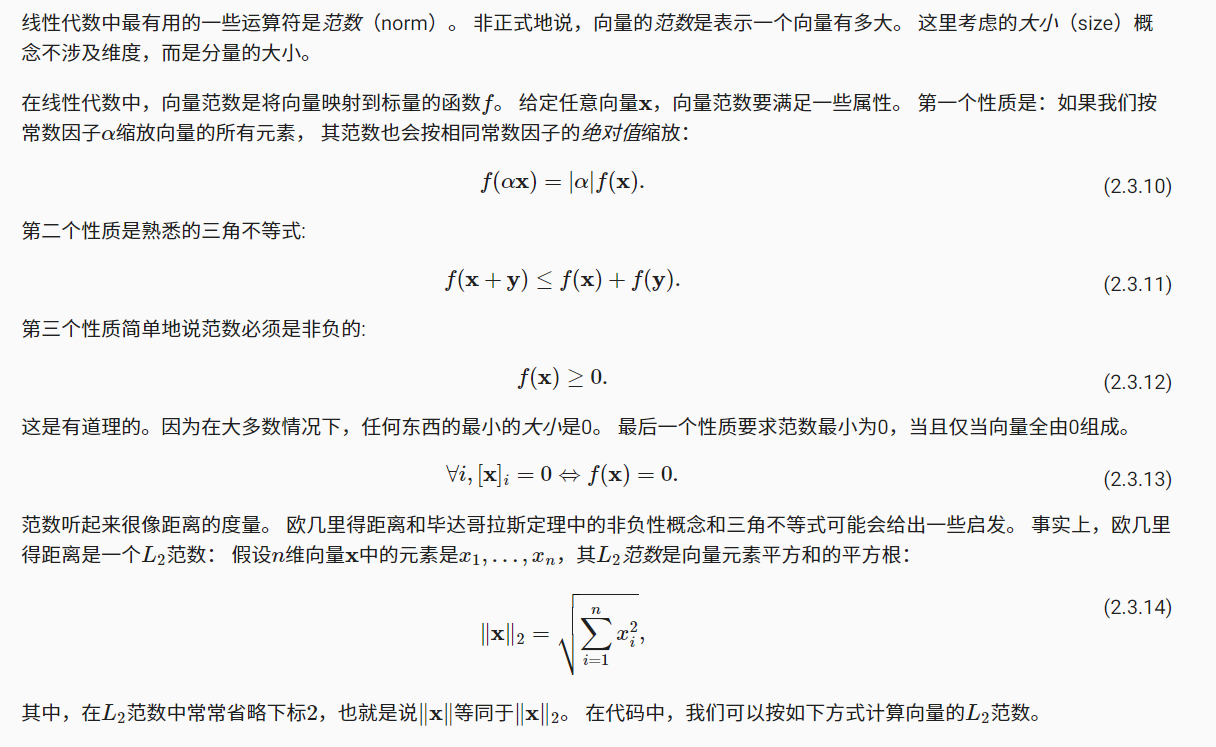

In [27]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

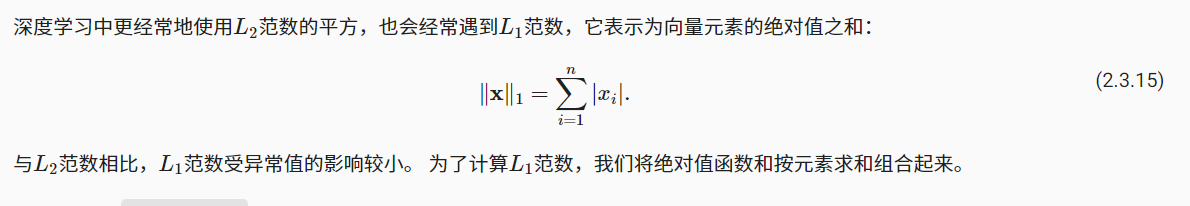

In [28]:
torch.abs(u).sum()

tensor(7.)

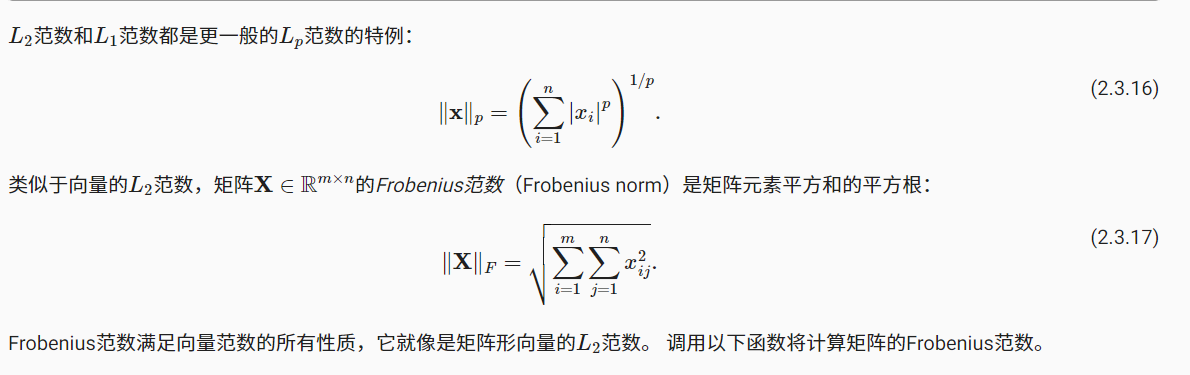

In [29]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 10.1. 范数和目标

>在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

# 11. 关于线性代数的更多信息

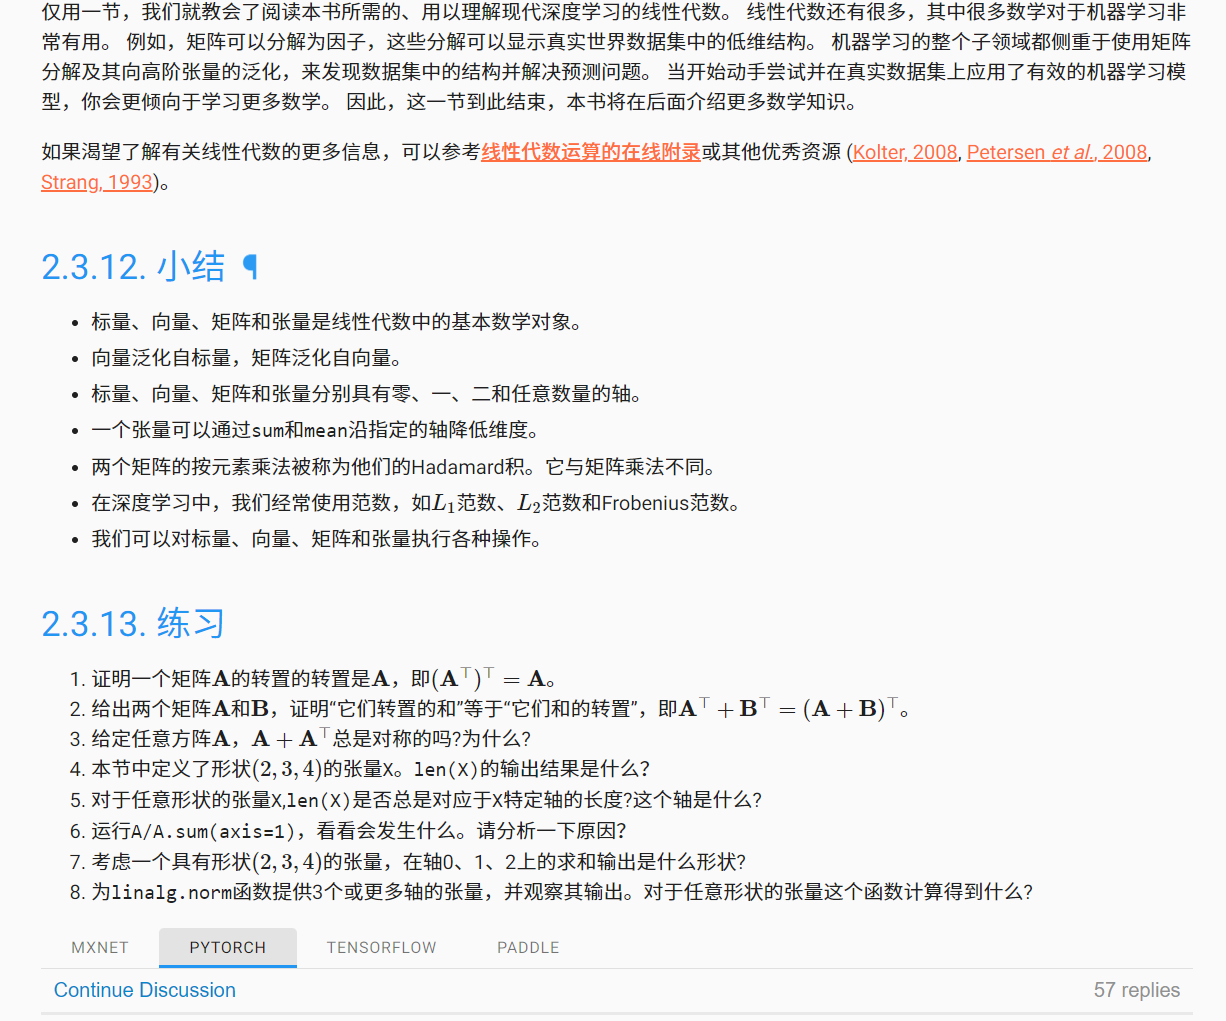